#### Clustering: case income/spent
For a large number a customers we have the income and what they have spent on a website during a reference period. We try to find clusters in these data. 

In [7]:
#Load the required packages
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

#Read the csv file
url = 'https://raw.githubusercontent.com/HOGENT-Databases/BI-BigData/master/data/customers.csv'
dataset=pd.read_csv(url,sep=',')

#Explore the dataset
print(dataset.head()) #top 5 columns
print(len(dataset))  # of rows

#descriptive statistics of the dataset
dataset.describe().transpose()

   INCOME  SPENT
0    2330    150
1    2500    187
2    2040    172
3    2360    178
4    3540    163
303


,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,2452.739274,484.994116,1260.0,2110.0,2400.0,2740.0,4170.0
SPENT,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


Since INCOME and SPENT have a different order of magnitude, which might confuse the algoritms, we first apply standard scaling to the input. The Python StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

income = dataset.drop('SPENT',axis=1)

spent = dataset.drop('INCOME',axis=1)

dataset['INCOME_SC'] = scaler.fit_transform(income)
dataset['SPENT_SC'] = scaler.fit_transform(spent)

print(dataset.head(10))

   INCOME  SPENT  INCOME_SC  SPENT_SC
0    2330    150  -0.253492  0.015443
1    2500    187   0.097607  1.633471
2    2040    172  -0.852427  0.977514
3    2360    178  -0.191534  1.239897
4    3540    163   2.245510  0.583939
5    1920    148  -1.100262 -0.072018
6    2940    153   1.006335  0.146634
7    2630    173   0.366095  1.021244
8    1990    162  -0.955692  0.540209
9    1680    174  -1.595932  1.064975


0    606
1    401
2    254
3    199
4    156
5    131
6    115
7    102
8     91
9     81
dtype: int64


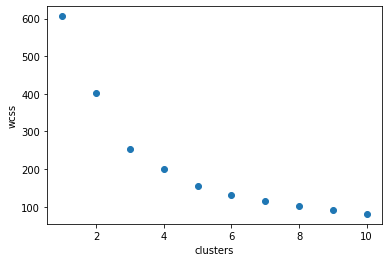

In [9]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    # k-means++ initializes the centroids to be (generally) distant from each other, 
    # leading to probably better results than random initialization
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(dataset[['INCOME_SC','SPENT_SC']])
    # inertia = within cluster some of squares (wcss)
    wcss.append(np.round(km.inertia_).astype('int64'))

wcss = pd.Series(wcss)

# Plot the dataset
import matplotlib.pyplot as plt
%matplotlib inline

print(wcss)

plt.scatter(range(1,11), wcss)
plt.xlabel('clusters')
plt.ylabel('wcss')

plt.show()

   INCOME  SPENT  INCOME_SC  SPENT_SC  Cluster
0    2330    150  -0.253492  0.015443        1
1    2500    187   0.097607  1.633471        1
2    2040    172  -0.852427  0.977514        1
3    2360    178  -0.191534  1.239897        1
4    3540    163   2.245510  0.583939        3


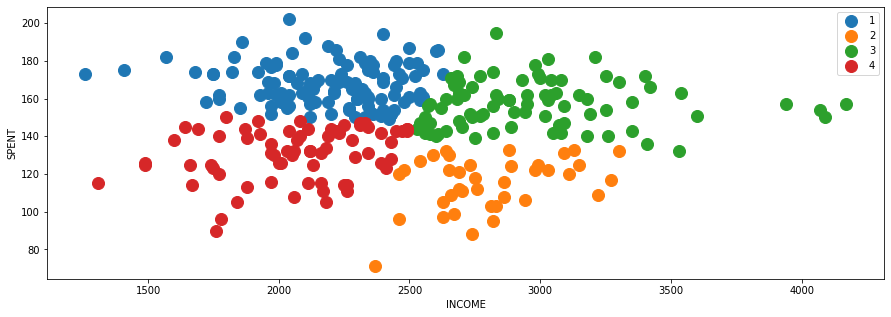

In [17]:
# Based on the elbow plot, we could choose 4,5 or 6 clusters. 
# Let us try 4, 5 and 6 clusters and visualize the clusters to decide on the final number of clusters.
# Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++')
y_means = km4.fit_predict(dataset[['INCOME_SC','SPENT_SC']])
dataset['Cluster'] = y_means+1
print(dataset.head())

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
groups = dataset.groupby('Cluster')

fig,ax = plt.subplots()

for name, group in groups:
    ax.plot(group.INCOME, group.SPENT, marker='o', linestyle='', ms=12, label=name)
    
plt.xlabel('INCOME')
plt.ylabel('SPENT')
    
ax.legend()

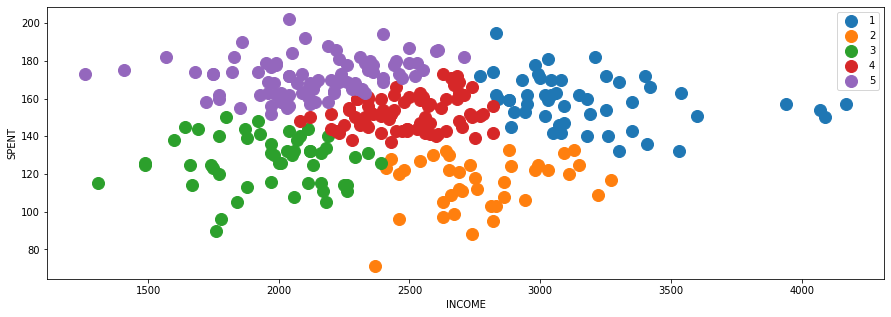

In [18]:
km5=KMeans(n_clusters=5,init='k-means++')
y_means = km5.fit_predict(dataset[['INCOME_SC','SPENT_SC']])
dataset['Cluster'] = y_means + 1

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
groups = dataset.groupby('Cluster')

fig,ax = plt.subplots()

for name, group in groups:
    ax.plot(group.INCOME, group.SPENT, marker='o', linestyle='', ms=12, label=name)
    
plt.xlabel('INCOME')
plt.ylabel('SPENT')

ax.legend()

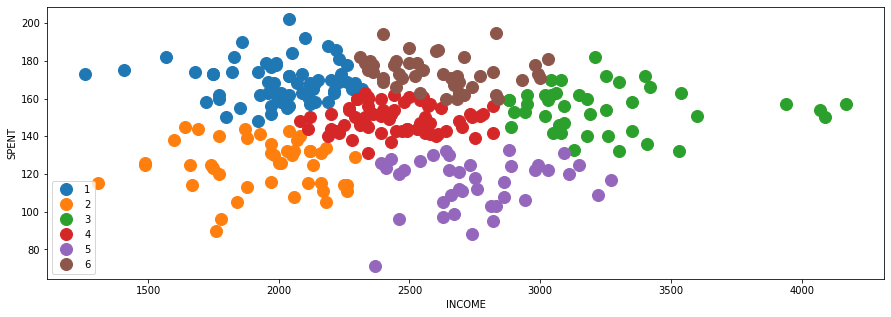

In [19]:
km6=KMeans(n_clusters=6,init='k-means++')
y_means = km6.fit_predict(dataset[['INCOME_SC','SPENT_SC']])
dataset['Cluster'] = y_means + 1

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
groups = dataset.groupby('Cluster')

fig,ax = plt.subplots()

for name, group in groups:
    ax.plot(group.INCOME, group.SPENT, marker='o', linestyle='', ms=12, label=name)
    
plt.xlabel('INCOME')
plt.ylabel('SPENT')

ax.legend()

4 clusters seems to be a good starting point: it makes alle combinations of high spent, low spent, high income and low income. 

#### The importance of scaling
To check the importance of scaling let's create 6 clusters using the original values for income and spent.

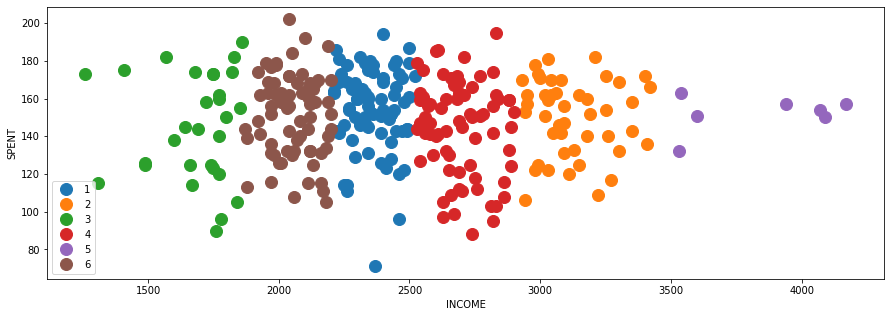

In [16]:
km6=KMeans(n_clusters=6,init='k-means++')
y_means = km6.fit_predict(dataset[['INCOME','SPENT']])
dataset['Cluster'] = y_means + 1

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
groups = dataset.groupby('Cluster')
print(groups)
fig,ax = plt.subplots()

for name, group in groups:
    ax.plot(group.INCOME, group.SPENT, marker='o', linestyle='', ms=12, label=name)
    
plt.xlabel('INCOME')
plt.ylabel('SPENT')

ax.legend()

We see the algorithm continue splitting along the INCOME axis because these are the larger numbers. Of course this does not make sense.